In [1]:
import config

In [2]:
import spotipy
import pandas as pd
import json
from spotipy.oauth2 import SpotifyClientCredentials

In [3]:
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id= config.client_id,
                                                           client_secret= config.client_secret))

In [4]:
import pprint

In [5]:
playlists = ['Latin','R&B', 'Love','Anime', 'Trending','Jazz', 'Metal', 'Party', 'Focus', 'Chill', 'Mood', 'Pop']
len(playlists)

12

In [6]:
def get_playlist_ids(playlists):
    ids = []

    def get_playlist_id(playlist):
        pl = sp.search(playlist, type="playlist")
        pl_id = pl["playlists"]["items"][0]["id"]
        return pl_id

    for playlist in playlists:
        ids.append(get_playlist_id(playlist))

    return ids

In [7]:
get_playlist_ids(playlists)

['37i9dQZF1EQmK1rjZuPGDt',
 '37i9dQZF1EQoqCH7BwIYb7',
 '0whWWNcAlFitbHMFFUIIyp',
 '1YA5cPIfDy3L03bGnNiDM7',
 '5JNNpb0q7ZIM3s3j355Anr',
 '37i9dQZF1DXbITWG1ZJKYt',
 '37i9dQZF1EQpgT26jgbgRI',
 '5xS3Gi0fA3Uo6RScucyct6',
 '37i9dQZF1DWZeKCadgRdKQ',
 '37i9dQZF1EVHGWrwldPRtj',
 '37i9dQZF1EVKuMoAJjoTIw',
 '37i9dQZF1EQncLwOalG3K7']

In [8]:
def get_playlist_tracks(username, playlist_id):
    results = sp.user_playlist_tracks(username,playlist_id,market="GB")
    tracks = results['items']
    while results['next']:
        results = sp.next(results)
        tracks.extend(results['items'])
    return tracks

In [9]:
def get_df_for_playlist(username, playlist_id):
    # Get playlist tracks
    playlist_tracks = get_playlist_tracks(username, playlist_id)

    # Extract track IDs
    track_ids = [track['track']['id'] for track in playlist_tracks]
    
    chunk_size = 100
    track_ids_chopped = [track_ids[i:i+chunk_size] for i in range(0,len(track_ids),chunk_size)]
    # Get audio features

    af_list = []
    for chunk in track_ids_chopped:
        af_list.extend(sp.audio_features(chunk))
        
    af_df = pd.DataFrame(af_list)
   

    return af_df

In [10]:
get_playlist_tracks("Spotify", '37i9dQZF1EQmK1rjZuPGDt')
Latin_df = get_df_for_playlist("Spotify", '37i9dQZF1EQmK1rjZuPGDt')
Latin_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.720,0.880,9,-2.834,1,0.1010,0.0562,0.060000,0.1530,0.463,180.011,audio_features,05WVKTdZhlIMX4qqMLuo0f,spotify:track:05WVKTdZhlIMX4qqMLuo0f,https://api.spotify.com/v1/tracks/05WVKTdZhlIM...,https://api.spotify.com/v1/audio-analysis/05WV...,197333,4
1,0.778,0.824,10,-5.892,0,0.0707,0.2840,0.000000,0.4050,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
2,0.537,0.421,5,-8.720,1,0.0285,0.8270,0.000000,0.1380,0.524,98.224,audio_features,2HafqoJbgXdtjwCOvNEF14,spotify:track:2HafqoJbgXdtjwCOvNEF14,https://api.spotify.com/v1/tracks/2HafqoJbgXdt...,https://api.spotify.com/v1/audio-analysis/2Haf...,184061,4
3,0.841,0.738,7,-7.455,0,0.3070,0.5200,0.000000,0.0892,0.484,169.918,audio_features,5RqSsdzTNPX1uzkmlHCFvK,spotify:track:5RqSsdzTNPX1uzkmlHCFvK,https://api.spotify.com/v1/tracks/5RqSsdzTNPX1...,https://api.spotify.com/v1/audio-analysis/5RqS...,172798,4
4,0.845,0.795,9,-3.502,0,0.0681,0.3430,0.000018,0.2240,0.681,94.969,audio_features,2kz1YOhJiNubjigR1gB1VX,spotify:track:2kz1YOhJiNubjigR1gB1VX,https://api.spotify.com/v1/tracks/2kz1YOhJiNub...,https://api.spotify.com/v1/audio-analysis/2kz1...,197053,4
5,0.616,0.989,9,-1.698,0,0.0483,0.1660,0.000000,0.1720,0.902,95.036,audio_features,0OMRAvrtLWE2TvcXorRiB9,spotify:track:0OMRAvrtLWE2TvcXorRiB9,https://api.spotify.com/v1/tracks/0OMRAvrtLWE2...,https://api.spotify.com/v1/audio-analysis/0OMR...,203160,4
6,0.708,0.737,1,-4.045,1,0.0436,0.0739,0.001620,0.0955,0.607,91.986,audio_features,7ABLbnD53cQK00mhcaOUVG,spotify:track:7ABLbnD53cQK00mhcaOUVG,https://api.spotify.com/v1/tracks/7ABLbnD53cQK...,https://api.spotify.com/v1/audio-analysis/7ABL...,197920,4
7,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,audio_features,6Sq7ltF9Qa7SNFBsV5Cogx,spotify:track:6Sq7ltF9Qa7SNFBsV5Cogx,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...,178567,4
8,0.720,0.630,4,-3.547,0,0.2770,0.6730,0.000000,0.0936,0.607,179.974,audio_features,0DWdj2oZMBFSzRsi2Cvfzf,spotify:track:0DWdj2oZMBFSzRsi2Cvfzf,https://api.spotify.com/v1/tracks/0DWdj2oZMBFS...,https://api.spotify.com/v1/audio-analysis/0DWd...,199440,4
9,0.730,0.809,5,-6.406,0,0.0876,0.2080,0.001300,0.0804,0.825,101.965,audio_features,2C2TGgFzrTRIOdQS1vUN5h,spotify:track:2C2TGgFzrTRIOdQS1vUN5h,https://api.spotify.com/v1/tracks/2C2TGgFzrTRI...,https://api.spotify.com/v1/audio-analysis/2C2T...,171093,4


In [11]:
get_playlist_tracks("Spotify", '37i9dQZF1EQoqCH7BwIYb7')
RnB_df = get_df_for_playlist("Spotify", '37i9dQZF1EQoqCH7BwIYb7')
RnB_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.684,0.607,11,-8.127,0,0.1000,0.02670,0.000307,0.1910,0.498,81.001,audio_features,0JXXNGljqupsJaZsgSbMZV,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://api.spotify.com/v1/tracks/0JXXNGljqups...,https://api.spotify.com/v1/audio-analysis/0JXX...,195373,4
1,0.595,0.678,9,-5.180,1,0.0335,0.01990,0.003890,0.4180,0.259,117.067,audio_features,5fEB6ZmVkg63GZg9qO86jh,spotify:track:5fEB6ZmVkg63GZg9qO86jh,https://api.spotify.com/v1/tracks/5fEB6ZmVkg63...,https://api.spotify.com/v1/audio-analysis/5fEB...,99213,4
2,0.731,0.807,3,-6.492,0,0.1000,0.18100,0.751000,0.3190,0.765,114.759,audio_features,2bLqfJjuC5syrsgDsZfGmn,spotify:track:2bLqfJjuC5syrsgDsZfGmn,https://api.spotify.com/v1/tracks/2bLqfJjuC5sy...,https://api.spotify.com/v1/audio-analysis/2bLq...,179120,4
3,0.688,0.519,5,-4.285,1,0.0283,0.06400,0.000000,0.1000,0.318,116.714,audio_features,0W4NhJhcqKCqEP2GIpDCDq,spotify:track:0W4NhJhcqKCqEP2GIpDCDq,https://api.spotify.com/v1/tracks/0W4NhJhcqKCq...,https://api.spotify.com/v1/audio-analysis/0W4N...,255333,4
4,0.569,0.596,8,-6.486,1,0.1720,0.45200,0.000079,0.2050,0.754,93.135,audio_features,4iuNZTcvT9diFySSzVsnVS,spotify:track:4iuNZTcvT9diFySSzVsnVS,https://api.spotify.com/v1/tracks/4iuNZTcvT9di...,https://api.spotify.com/v1/audio-analysis/4iuN...,217347,4
5,0.660,0.646,2,-9.111,0,0.0426,0.03120,0.000005,0.0330,0.621,172.376,audio_features,3eRE1KwnUma75nu1HhoNY4,spotify:track:3eRE1KwnUma75nu1HhoNY4,https://api.spotify.com/v1/tracks/3eRE1KwnUma7...,https://api.spotify.com/v1/audio-analysis/3eRE...,284080,4
6,0.656,0.479,7,-7.055,0,0.0348,0.06650,0.002720,0.1680,0.708,184.374,audio_features,3c6afiysmB7OnxQzzSqRfD,spotify:track:3c6afiysmB7OnxQzzSqRfD,https://api.spotify.com/v1/tracks/3c6afiysmB7O...,https://api.spotify.com/v1/audio-analysis/3c6a...,261867,4
7,0.741,0.508,11,-5.099,0,0.0507,0.03470,0.000064,0.0602,0.354,121.965,audio_features,6gdhHMWUv1pvkOHqCUGvCp,spotify:track:6gdhHMWUv1pvkOHqCUGvCp,https://api.spotify.com/v1/tracks/6gdhHMWUv1pv...,https://api.spotify.com/v1/audio-analysis/6gdh...,270760,4
8,0.693,0.533,2,-10.954,0,0.0402,0.10700,0.000000,0.0695,0.568,127.661,audio_features,71EHOyEOhNx1SzTebRRyng,spotify:track:71EHOyEOhNx1SzTebRRyng,https://api.spotify.com/v1/tracks/71EHOyEOhNx1...,https://api.spotify.com/v1/audio-analysis/71EH...,291907,4
9,0.733,0.521,3,-3.657,0,0.0457,0.10700,0.000000,0.0692,0.525,112.913,audio_features,3OUApyz3jDB3syGUNGqB1d,spotify:track:3OUApyz3jDB3syGUNGqB1d,https://api.spotify.com/v1/tracks/3OUApyz3jDB3...,https://api.spotify.com/v1/audio-analysis/3OUA...,294693,4


In [12]:
get_playlist_tracks("Spotify", '0whWWNcAlFitbHMFFUIIyp')
Love_df = get_df_for_playlist("Spotify", '0whWWNcAlFitbHMFFUIIyp')
Love_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.673,0.523,2,-4.195,0,0.0293,0.0834,0,0.124,0.294,116.850,audio_features,2Mmid8aKghvsPgaQIFMrPJ,spotify:track:2Mmid8aKghvsPgaQIFMrPJ,https://api.spotify.com/v1/tracks/2Mmid8aKghvs...,https://api.spotify.com/v1/audio-analysis/2Mmi...,255333,4
1,0.691,0.517,2,-4.271,0,0.0285,0.0486,0,0.098,0.333,116.672,audio_features,11da2dMQkeFZixxHZJYs6m,spotify:track:11da2dMQkeFZixxHZJYs6m,https://api.spotify.com/v1/tracks/11da2dMQkeFZ...,https://api.spotify.com/v1/audio-analysis/11da...,255173,4
2,0.691,0.517,2,-4.271,0,0.0285,0.0486,0,0.098,0.333,116.672,audio_features,6jXEyDzSfzZ68ZpsMcmOj1,spotify:track:6jXEyDzSfzZ68ZpsMcmOj1,https://api.spotify.com/v1/tracks/6jXEyDzSfzZ6...,https://api.spotify.com/v1/audio-analysis/6jXE...,255173,4
3,0.688,0.519,5,-4.285,1,0.0283,0.0640,0,0.100,0.318,116.714,audio_features,0W4NhJhcqKCqEP2GIpDCDq,spotify:track:0W4NhJhcqKCqEP2GIpDCDq,https://api.spotify.com/v1/tracks/0W4NhJhcqKCq...,https://api.spotify.com/v1/audio-analysis/0W4N...,255333,4
4,0.691,0.517,2,-4.271,0,0.0285,0.0486,0,0.098,0.333,116.672,audio_features,4SbyspTyB4sHhpOcTLgawJ,spotify:track:4SbyspTyB4sHhpOcTLgawJ,https://api.spotify.com/v1/tracks/4SbyspTyB4sH...,https://api.spotify.com/v1/audio-analysis/4Sby...,255173,4
5,0.688,0.519,5,-4.285,1,0.0283,0.0640,0,0.100,0.318,116.714,audio_features,0W4NhJhcqKCqEP2GIpDCDq,spotify:track:0W4NhJhcqKCqEP2GIpDCDq,https://api.spotify.com/v1/tracks/0W4NhJhcqKCq...,https://api.spotify.com/v1/audio-analysis/0W4N...,255333,4
6,0.691,0.517,2,-4.271,0,0.0285,0.0486,0,0.098,0.333,116.672,audio_features,08gmGkTgzLbGiNUWSLUs5B,spotify:track:08gmGkTgzLbGiNUWSLUs5B,https://api.spotify.com/v1/tracks/08gmGkTgzLbG...,https://api.spotify.com/v1/audio-analysis/08gm...,255173,4
7,0.691,0.517,2,-4.271,0,0.0285,0.0486,0,0.098,0.333,116.672,audio_features,4hl1CDoqvimmDGUNbOR8AA,spotify:track:4hl1CDoqvimmDGUNbOR8AA,https://api.spotify.com/v1/tracks/4hl1CDoqvimm...,https://api.spotify.com/v1/audio-analysis/4hl1...,255173,4
8,0.688,0.519,5,-4.285,1,0.0283,0.0640,0,0.100,0.318,116.714,audio_features,0W4NhJhcqKCqEP2GIpDCDq,spotify:track:0W4NhJhcqKCqEP2GIpDCDq,https://api.spotify.com/v1/tracks/0W4NhJhcqKCq...,https://api.spotify.com/v1/audio-analysis/0W4N...,255333,4
9,0.688,0.519,5,-4.285,1,0.0283,0.0640,0,0.100,0.318,116.714,audio_features,0W4NhJhcqKCqEP2GIpDCDq,spotify:track:0W4NhJhcqKCqEP2GIpDCDq,https://api.spotify.com/v1/tracks/0W4NhJhcqKCq...,https://api.spotify.com/v1/audio-analysis/0W4N...,255333,4


In [13]:
get_playlist_tracks("Spotify", '1YA5cPIfDy3L03bGnNiDM7')
Anime_df = get_df_for_playlist("Spotify", '1YA5cPIfDy3L03bGnNiDM7')
Anime_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.577,0.941,1,-5.170,1,0.1050,0.002070,0.000003,0.0891,0.292,101.921,audio_features,3khEEPRyBeOUabbmOPJzAG,spotify:track:3khEEPRyBeOUabbmOPJzAG,https://api.spotify.com/v1/tracks/3khEEPRyBeOU...,https://api.spotify.com/v1/audio-analysis/3khE...,193495,4
1,0.536,0.966,6,-2.929,0,0.0558,0.121000,0.000000,0.0477,0.849,152.076,audio_features,2XpV9sHBexcNrz0Gyf3l18,spotify:track:2XpV9sHBexcNrz0Gyf3l18,https://api.spotify.com/v1/tracks/2XpV9sHBexcN...,https://api.spotify.com/v1/audio-analysis/2XpV...,215707,4
2,0.566,0.850,6,-4.431,0,0.0599,0.066300,0.000000,0.3190,0.722,117.048,audio_features,0GWNtMohuYUEHVZ40tcnHF,spotify:track:0GWNtMohuYUEHVZ40tcnHF,https://api.spotify.com/v1/tracks/0GWNtMohuYUE...,https://api.spotify.com/v1/audio-analysis/0GWN...,238987,4
3,0.541,0.977,4,-2.828,0,0.1570,0.003210,0.000051,0.0796,0.263,134.938,audio_features,0qMip0B2D4ePEjBJvAtYre,spotify:track:0qMip0B2D4ePEjBJvAtYre,https://api.spotify.com/v1/tracks/0qMip0B2D4eP...,https://api.spotify.com/v1/audio-analysis/0qMi...,237587,4
4,0.508,0.889,7,-2.755,0,0.0862,0.049500,0.000000,0.0984,0.332,135.014,audio_features,1rN9QoVxw5U7TJkyaUR8C1,spotify:track:1rN9QoVxw5U7TJkyaUR8C1,https://api.spotify.com/v1/tracks/1rN9QoVxw5U7...,https://api.spotify.com/v1/audio-analysis/1rN9...,238360,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0.612,0.259,11,-11.096,0,0.0999,0.196000,0.901000,0.1060,0.214,149.957,audio_features,4k3bQolPVSky3itPqhsrlY,spotify:track:4k3bQolPVSky3itPqhsrlY,https://api.spotify.com/v1/tracks/4k3bQolPVSky...,https://api.spotify.com/v1/audio-analysis/4k3b...,105617,4
124,0.466,0.948,5,-4.139,1,0.1650,0.014000,0.000000,0.1080,0.288,92.124,audio_features,1a1b22lYmn0y5YPJUGFCqb,spotify:track:1a1b22lYmn0y5YPJUGFCqb,https://api.spotify.com/v1/tracks/1a1b22lYmn0y...,https://api.spotify.com/v1/audio-analysis/1a1b...,183680,4
125,0.634,0.188,6,-18.921,0,0.0419,0.595000,0.895000,0.1110,0.387,75.004,audio_features,4zQ4d7cQk1aMBD7P3cuiBo,spotify:track:4zQ4d7cQk1aMBD7P3cuiBo,https://api.spotify.com/v1/tracks/4zQ4d7cQk1aM...,https://api.spotify.com/v1/audio-analysis/4zQ4...,86417,4
126,0.656,0.396,2,-14.751,1,0.0367,0.159000,0.730000,0.1240,0.225,74.985,audio_features,5oXjsCnKEM3Y1I4BaFduWW,spotify:track:5oXjsCnKEM3Y1I4BaFduWW,https://api.spotify.com/v1/tracks/5oXjsCnKEM3Y...,https://api.spotify.com/v1/audio-analysis/5oXj...,102808,4


In [14]:
get_playlist_tracks("Spotify", '5JNNpb0q7ZIM3s3j355Anr')
Trending_df =get_df_for_playlist("Spotify", '5JNNpb0q7ZIM3s3j355Anr')
Trending_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.788,0.758,1,-6.513,1,0.0505,0.19800,0.000085,0.104,0.823,119.008,audio_features,7gaA3wERFkFkgivjwbSvkG,spotify:track:7gaA3wERFkFkgivjwbSvkG,https://api.spotify.com/v1/tracks/7gaA3wERFkFk...,https://api.spotify.com/v1/audio-analysis/7gaA...,214994,4
1,0.666,0.612,2,-6.583,0,0.0402,0.32600,0.000015,0.125,0.444,99.183,audio_features,26KzbA70uJAjClpWEMg4Pq,spotify:track:26KzbA70uJAjClpWEMg4Pq,https://api.spotify.com/v1/tracks/26KzbA70uJAj...,https://api.spotify.com/v1/audio-analysis/26Kz...,162333,4
2,0.481,0.363,5,-9.548,1,0.0379,0.26000,0.000001,0.143,0.221,130.227,audio_features,1ym0ECboSbXoUO7ZavNjin,spotify:track:1ym0ECboSbXoUO7ZavNjin,https://api.spotify.com/v1/tracks/1ym0ECboSbXo...,https://api.spotify.com/v1/audio-analysis/1ym0...,145846,4
3,0.575,0.369,8,-10.444,1,0.1110,0.00724,0.000001,0.691,0.541,128.815,audio_features,4tdWPKCdZPoDf1SgCLmLNR,spotify:track:4tdWPKCdZPoDf1SgCLmLNR,https://api.spotify.com/v1/tracks/4tdWPKCdZPoD...,https://api.spotify.com/v1/audio-analysis/4tdW...,200597,3
4,0.366,0.403,9,-5.678,1,0.0297,0.74000,0.000002,0.111,0.373,179.998,audio_features,295EU7u2RUFizgYHQUT0xc,spotify:track:295EU7u2RUFizgYHQUT0xc,https://api.spotify.com/v1/tracks/295EU7u2RUFi...,https://api.spotify.com/v1/audio-analysis/295E...,225386,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,0.544,0.831,8,-3.578,1,0.0941,0.54300,0.000000,0.118,0.233,130.005,audio_features,51hyZpbJlIgZIaX3TtMxmu,spotify:track:51hyZpbJlIgZIaX3TtMxmu,https://api.spotify.com/v1/tracks/51hyZpbJlIgZ...,https://api.spotify.com/v1/audio-analysis/51hy...,143940,4
64,0.740,0.697,8,-4.912,1,0.0340,0.02680,0.000000,0.224,0.732,138.992,audio_features,6dgUya35uo964z7GZXM07g,spotify:track:6dgUya35uo964z7GZXM07g,https://api.spotify.com/v1/tracks/6dgUya35uo96...,https://api.spotify.com/v1/audio-analysis/6dgU...,163648,4
65,0.783,0.592,11,-8.332,0,0.0331,0.43500,0.000004,0.347,0.726,120.018,audio_features,739WUU1tPFLO4x4HJq561K,spotify:track:739WUU1tPFLO4x4HJq561K,https://api.spotify.com/v1/tracks/739WUU1tPFLO...,https://api.spotify.com/v1/audio-analysis/739W...,174253,4
66,0.518,0.368,11,-7.760,0,0.0353,0.85500,0.000005,0.119,0.234,141.934,audio_features,17cia5k4BpGVlyEfqrFH50,spotify:track:17cia5k4BpGVlyEfqrFH50,https://api.spotify.com/v1/tracks/17cia5k4BpGV...,https://api.spotify.com/v1/audio-analysis/17ci...,205484,4


In [15]:
get_playlist_tracks("Spotify", '37i9dQZF1DXbITWG1ZJKYt')
Jazz_df = get_df_for_playlist("Spotify", '37i9dQZF1DXbITWG1ZJKYt')
Jazz_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.271,0.1650,5,-20.652,1,0.0351,0.729,0.000002,0.1180,0.203,77.082,audio_features,29U7stRjqHU6rMiS8BfaI9,spotify:track:29U7stRjqHU6rMiS8BfaI9,https://api.spotify.com/v1/tracks/29U7stRjqHU6...,https://api.spotify.com/v1/audio-analysis/29U7...,139227,4
1,0.747,0.2430,4,-15.134,0,0.1240,0.829,0.000001,0.0905,0.426,118.661,audio_features,5Lhjlnly9Ynhf52ojQS534,spotify:track:5Lhjlnly9Ynhf52ojQS534,https://api.spotify.com/v1/tracks/5Lhjlnly9Ynh...,https://api.spotify.com/v1/audio-analysis/5Lhj...,215747,4
2,0.262,0.3560,0,-8.031,0,0.0303,0.613,0.000000,0.1750,0.426,174.176,audio_features,2IdwQxhJn9ZE4zIotcCefR,spotify:track:2IdwQxhJn9ZE4zIotcCefR,https://api.spotify.com/v1/tracks/2IdwQxhJn9ZE...,https://api.spotify.com/v1/audio-analysis/2Idw...,187667,3
3,0.349,0.1820,5,-13.507,1,0.0310,0.920,0.015200,0.1430,0.178,136.094,audio_features,648TTtYB0bH0P8Hfy0FmkL,spotify:track:648TTtYB0bH0P8Hfy0FmkL,https://api.spotify.com/v1/tracks/648TTtYB0bH0...,https://api.spotify.com/v1/audio-analysis/648T...,191973,3
4,0.454,0.2600,8,-13.193,0,0.0401,0.539,0.000780,0.0675,0.598,174.322,audio_features,1YQWosTIljIvxAgHWTp7KP,spotify:track:1YQWosTIljIvxAgHWTp7KP,https://api.spotify.com/v1/tracks/1YQWosTIljIv...,https://api.spotify.com/v1/audio-analysis/1YQW...,324133,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0.458,0.1550,10,-17.853,1,0.0405,0.908,0.621000,0.2990,0.276,126.281,audio_features,2bPeAxNC1S1C359ds8Tw3X,spotify:track:2bPeAxNC1S1C359ds8Tw3X,https://api.spotify.com/v1/tracks/2bPeAxNC1S1C...,https://api.spotify.com/v1/audio-analysis/2bPe...,526893,4
246,0.649,0.2710,5,-15.198,0,0.0498,0.708,0.000005,0.1240,0.626,126.026,audio_features,4jCoxXaEKeTWkQ7HL1d5de,spotify:track:4jCoxXaEKeTWkQ7HL1d5de,https://api.spotify.com/v1/tracks/4jCoxXaEKeTW...,https://api.spotify.com/v1/audio-analysis/4jCo...,441027,4
247,0.350,0.6070,5,-11.141,0,0.0498,0.794,0.446000,0.1160,0.597,187.101,audio_features,1QlTNF43OyKK9BorIRsJ8o,spotify:track:1QlTNF43OyKK9BorIRsJ8o,https://api.spotify.com/v1/tracks/1QlTNF43OyKK...,https://api.spotify.com/v1/audio-analysis/1QlT...,422640,4
248,0.355,0.1520,5,-14.864,0,0.0401,0.924,0.077100,0.1260,0.145,65.215,audio_features,6x8XKDM8Rnid4TyOUg9kj3,spotify:track:6x8XKDM8Rnid4TyOUg9kj3,https://api.spotify.com/v1/tracks/6x8XKDM8Rnid...,https://api.spotify.com/v1/audio-analysis/6x8X...,320773,4


In [16]:
get_playlist_tracks("Spotify", '37i9dQZF1EQpgT26jgbgRI')
Metal_df = get_df_for_playlist("Spotify", '37i9dQZF1EQpgT26jgbgRI')
Metal_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.469,0.713,0,-5.619,0,0.0461,0.086900,0.000188,0.1290,0.267,154.994,audio_features,6tRneEcItwpSxBtqgem5Dr,spotify:track:6tRneEcItwpSxBtqgem5Dr,https://api.spotify.com/v1/tracks/6tRneEcItwpS...,https://api.spotify.com/v1/audio-analysis/6tRn...,241499,4
1,0.521,0.895,7,-5.242,1,0.0442,0.000055,0.349000,0.0985,0.237,120.117,audio_features,2bPGTMB5sFfFYQ2YvSmup0,spotify:track:2bPGTMB5sFfFYQ2YvSmup0,https://api.spotify.com/v1/tracks/2bPGTMB5sFfF...,https://api.spotify.com/v1/audio-analysis/2bPG...,322340,4
2,0.395,0.701,10,-5.471,0,0.0377,0.001480,0.004900,0.0500,0.148,172.965,audio_features,0S38Oso3I9vpDXcTb7kYt9,spotify:track:0S38Oso3I9vpDXcTb7kYt9,https://api.spotify.com/v1/tracks/0S38Oso3I9vp...,https://api.spotify.com/v1/audio-analysis/0S38...,395716,4
3,0.568,0.981,2,-3.889,1,0.0887,0.002690,0.002750,0.0243,0.307,135.146,audio_features,3RAFcUBrCNaboRXoP3S5t1,spotify:track:3RAFcUBrCNaboRXoP3S5t1,https://api.spotify.com/v1/tracks/3RAFcUBrCNab...,https://api.spotify.com/v1/audio-analysis/3RAF...,284120,4
4,0.580,0.916,3,-4.358,0,0.0387,0.000297,0.025900,0.1260,0.683,118.004,audio_features,5anCkDvJ17aznvK5TED5uo,spotify:track:5anCkDvJ17aznvK5TED5uo,https://api.spotify.com/v1/tracks/5anCkDvJ17az...,https://api.spotify.com/v1/audio-analysis/5anC...,305907,4
5,0.473,0.783,10,-10.671,0,0.0869,0.012500,0.475000,0.2680,0.124,91.976,audio_features,54yLLvpezvPO1lA3GspiZj,spotify:track:54yLLvpezvPO1lA3GspiZj,https://api.spotify.com/v1/tracks/54yLLvpezvPO...,https://api.spotify.com/v1/audio-analysis/54yL...,340640,4
6,0.428,0.874,4,-6.664,0,0.1280,0.000337,0.041900,0.3110,0.261,119.708,audio_features,6ursmCnbc9oDRGa2yHKkoZ,spotify:track:6ursmCnbc9oDRGa2yHKkoZ,https://api.spotify.com/v1/tracks/6ursmCnbc9oD...,https://api.spotify.com/v1/audio-analysis/6urs...,212253,4
7,0.313,0.882,0,-6.215,1,0.0355,0.034600,0.338000,0.4500,0.300,103.981,audio_features,469rBLYJUZHMJLtq2Wch3h,spotify:track:469rBLYJUZHMJLtq2Wch3h,https://api.spotify.com/v1/tracks/469rBLYJUZHM...,https://api.spotify.com/v1/audio-analysis/469r...,431093,4
8,0.435,0.987,1,-4.667,0,0.1600,0.000195,0.084700,0.2680,0.101,103.160,audio_features,0L7zm6afBEtrNKo6C6Gj08,spotify:track:0L7zm6afBEtrNKo6C6Gj08,https://api.spotify.com/v1/tracks/0L7zm6afBEtr...,https://api.spotify.com/v1/audio-analysis/0L7z...,365827,4
9,0.427,0.946,7,-2.188,1,0.0469,0.000118,0.025300,0.0604,0.237,101.305,audio_features,5mpUKTdskZea0gStWzeHUZ,spotify:track:5mpUKTdskZea0gStWzeHUZ,https://api.spotify.com/v1/tracks/5mpUKTdskZea...,https://api.spotify.com/v1/audio-analysis/5mpU...,260773,4


In [17]:
get_playlist_tracks("Spotify", '5xS3Gi0fA3Uo6RScucyct6')
Party_df = get_df_for_playlist("Spotify", '5xS3Gi0fA3Uo6RScucyct6')
Party_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.435,0.837,3,-8.126,1,0.4490,0.00676,0.000000,0.1170,0.778,124.913,audio_features,5AyL2kgLtTWEu3qO3B9SqK,spotify:track:5AyL2kgLtTWEu3qO3B9SqK,https://api.spotify.com/v1/tracks/5AyL2kgLtTWE...,https://api.spotify.com/v1/audio-analysis/5AyL...,216893,4
1,0.825,0.856,1,-1.912,1,0.0476,0.00851,0.000001,0.1270,0.207,128.016,audio_features,1V4jC0vJ5525lEF1bFgPX2,spotify:track:1V4jC0vJ5525lEF1bFgPX2,https://api.spotify.com/v1/tracks/1V4jC0vJ5525...,https://api.spotify.com/v1/audio-analysis/1V4j...,222133,4
2,0.747,0.716,11,-2.457,0,0.0750,0.13500,0.000000,0.2510,0.751,125.008,audio_features,2EBCVPNAG46nbgs6jXPGvv,spotify:track:2EBCVPNAG46nbgs6jXPGvv,https://api.spotify.com/v1/tracks/2EBCVPNAG46n...,https://api.spotify.com/v1/audio-analysis/2EBC...,210627,4
3,0.706,0.890,1,-4.444,0,0.0688,0.05880,0.002860,0.3060,0.684,128.011,audio_features,2LEF1A8DOZ9wRYikWgVlZ8,spotify:track:2LEF1A8DOZ9wRYikWgVlZ8,https://api.spotify.com/v1/tracks/2LEF1A8DOZ9w...,https://api.spotify.com/v1/audio-analysis/2LEF...,248133,4
4,0.761,0.933,10,-5.380,1,0.0560,0.09080,0.000085,0.0607,0.836,122.959,audio_features,4Y7XAxTANhu3lmnLAzhWJW,spotify:track:4Y7XAxTANhu3lmnLAzhWJW,https://api.spotify.com/v1/tracks/4Y7XAxTANhu3...,https://api.spotify.com/v1/audio-analysis/4Y7X...,236200,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.671,0.876,7,-5.681,0,0.0352,0.12000,0.188000,0.0823,0.964,129.998,audio_features,23RoR84KodL5HWvUTneQ1w,spotify:track:23RoR84KodL5HWvUTneQ1w,https://api.spotify.com/v1/tracks/23RoR84KodL5...,https://api.spotify.com/v1/audio-analysis/23Ro...,231545,4
144,0.583,0.909,5,-4.882,1,0.0325,0.00855,0.135000,0.2710,0.367,139.954,audio_features,5ijML7DScEkdopfGuti7E9,spotify:track:5ijML7DScEkdopfGuti7E9,https://api.spotify.com/v1/tracks/5ijML7DScEkd...,https://api.spotify.com/v1/audio-analysis/5ijM...,135429,4
145,0.646,0.823,2,-4.123,0,0.0394,0.21300,0.000000,0.3220,0.418,128.035,audio_features,7MmG8p0F9N3C4AXdK6o6Eb,spotify:track:7MmG8p0F9N3C4AXdK6o6Eb,https://api.spotify.com/v1/tracks/7MmG8p0F9N3C...,https://api.spotify.com/v1/audio-analysis/7MmG...,227267,4
146,0.695,0.869,8,-5.066,1,0.0483,0.41000,0.000000,0.2370,0.580,124.989,audio_features,05SBRd4fXgn8FX7bf8BCAE,spotify:track:05SBRd4fXgn8FX7bf8BCAE,https://api.spotify.com/v1/tracks/05SBRd4fXgn8...,https://api.spotify.com/v1/audio-analysis/05SB...,234507,4


In [18]:
get_playlist_tracks("Spotify", '37i9dQZF1DWZeKCadgRdKQ')
Focus_df = get_df_for_playlist("Spotify", '37i9dQZF1DWZeKCadgRdKQ')
Focus_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.587,0.06140,9,-22.387,0,0.0484,0.981,0.894,0.1120,0.3990,75.041,audio_features,1ELJ66txni1o86RVvdcgHb,spotify:track:1ELJ66txni1o86RVvdcgHb,https://api.spotify.com/v1/tracks/1ELJ66txni1o...,https://api.spotify.com/v1/audio-analysis/1ELJ...,156067,4
1,0.599,0.11400,4,-20.061,1,0.0399,0.966,0.917,0.1090,0.0553,79.979,audio_features,2MveOWtavb89Lk09bcPoi8,spotify:track:2MveOWtavb89Lk09bcPoi8,https://api.spotify.com/v1/tracks/2MveOWtavb89...,https://api.spotify.com/v1/audio-analysis/2Mve...,129187,4
2,0.297,0.04610,0,-20.517,0,0.0336,0.910,0.895,0.1120,0.0927,73.838,audio_features,1HsNwZPWvrN8gZ44YnjOCo,spotify:track:1HsNwZPWvrN8gZ44YnjOCo,https://api.spotify.com/v1/tracks/1HsNwZPWvrN8...,https://api.spotify.com/v1/audio-analysis/1HsN...,126506,4
3,0.577,0.07210,2,-22.973,1,0.0317,0.981,0.898,0.1110,0.2420,73.998,audio_features,6zTbtySCRStJOv5xA4XvRE,spotify:track:6zTbtySCRStJOv5xA4XvRE,https://api.spotify.com/v1/tracks/6zTbtySCRStJ...,https://api.spotify.com/v1/audio-analysis/6zTb...,151917,4
4,0.467,0.24300,11,-22.534,1,0.0332,0.842,0.947,0.1150,0.0541,75.031,audio_features,6cr9XbO2yAJgTNa6XNRINF,spotify:track:6cr9XbO2yAJgTNa6XNRINF,https://api.spotify.com/v1/tracks/6cr9XbO2yAJg...,https://api.spotify.com/v1/audio-analysis/6cr9...,158000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.268,0.02340,0,-27.141,1,0.0487,0.995,0.929,0.0975,0.0382,99.734,audio_features,6oJIMUBDopuFljMNBFrq9Z,spotify:track:6oJIMUBDopuFljMNBFrq9Z,https://api.spotify.com/v1/tracks/6oJIMUBDopuF...,https://api.spotify.com/v1/audio-analysis/6oJI...,138629,4
182,0.245,0.03490,9,-27.828,0,0.0358,0.763,0.938,0.1040,0.0390,84.674,audio_features,2PlPzw2QFgaGfGNxf6yxf4,spotify:track:2PlPzw2QFgaGfGNxf6yxf4,https://api.spotify.com/v1/tracks/2PlPzw2QFgaG...,https://api.spotify.com/v1/audio-analysis/2PlP...,123354,5
183,0.296,0.06040,7,-19.685,1,0.0393,0.971,0.896,0.1110,0.1500,81.874,audio_features,5Uj3rUYghH7vcKl5IiitWC,spotify:track:5Uj3rUYghH7vcKl5IiitWC,https://api.spotify.com/v1/tracks/5Uj3rUYghH7v...,https://api.spotify.com/v1/audio-analysis/5Uj3...,135417,5
184,0.281,0.00943,10,-22.661,1,0.0374,0.995,0.964,0.1160,0.0384,70.348,audio_features,0VZSqwbrOlZxOEakvAQX5a,spotify:track:0VZSqwbrOlZxOEakvAQX5a,https://api.spotify.com/v1/tracks/0VZSqwbrOlZx...,https://api.spotify.com/v1/audio-analysis/0VZS...,145475,5


In [19]:
get_playlist_tracks("Spotify", '37i9dQZF1EVHGWrwldPRtj')
Chill_df = get_df_for_playlist("Spotify", '37i9dQZF1EVHGWrwldPRtj')
Chill_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.485,0.4090,9,-10.711,0,0.1010,0.3250,0.000000,0.1030,0.3760,138.419,audio_features,3hxIUxnT27p5WcmjGUXNwx,spotify:track:3hxIUxnT27p5WcmjGUXNwx,https://api.spotify.com/v1/tracks/3hxIUxnT27p5...,https://api.spotify.com/v1/audio-analysis/3hxI...,164571,4
1,0.684,0.6070,11,-8.127,0,0.1000,0.0267,0.000307,0.1910,0.4980,81.001,audio_features,0JXXNGljqupsJaZsgSbMZV,spotify:track:0JXXNGljqupsJaZsgSbMZV,https://api.spotify.com/v1/tracks/0JXXNGljqups...,https://api.spotify.com/v1/audio-analysis/0JXX...,195373,4
2,0.603,0.7840,6,-4.023,1,0.0620,0.4460,0.000008,0.1190,0.7690,172.041,audio_features,3EaJDYHA0KnX88JvDhL9oa,spotify:track:3EaJDYHA0KnX88JvDhL9oa,https://api.spotify.com/v1/tracks/3EaJDYHA0KnX...,https://api.spotify.com/v1/audio-analysis/3EaJ...,173104,4
3,0.721,0.3390,0,-11.195,1,0.0532,0.4090,0.001530,0.0973,0.2000,129.830,audio_features,7DfFc7a6Rwfi3YQMRbDMau,spotify:track:7DfFc7a6Rwfi3YQMRbDMau,https://api.spotify.com/v1/tracks/7DfFc7a6Rwfi...,https://api.spotify.com/v1/audio-analysis/7DfF...,200747,4
4,0.476,0.1610,8,-11.665,0,0.0407,0.9670,0.038100,0.1090,0.0908,119.614,audio_features,1PDP7mLiAMwhfmgIwzhOm2,spotify:track:1PDP7mLiAMwhfmgIwzhOm2,https://api.spotify.com/v1/tracks/1PDP7mLiAMwh...,https://api.spotify.com/v1/audio-analysis/1PDP...,133763,4
5,0.781,0.2500,9,-9.702,0,0.0297,0.7080,0.910000,0.3750,0.4540,103.478,audio_features,6G6M4fl2I0eqEQnzyTwR8m,spotify:track:6G6M4fl2I0eqEQnzyTwR8m,https://api.spotify.com/v1/tracks/6G6M4fl2I0eq...,https://api.spotify.com/v1/audio-analysis/6G6M...,209317,4
6,0.851,0.4340,0,-9.551,1,0.0720,0.5200,0.000000,0.1710,0.9260,80.015,audio_features,2o0qEJLFTlR3NPxLy7Hz0T,spotify:track:2o0qEJLFTlR3NPxLy7Hz0T,https://api.spotify.com/v1/tracks/2o0qEJLFTlR3...,https://api.spotify.com/v1/audio-analysis/2o0q...,175219,4
7,0.372,0.2390,6,-11.314,0,0.0296,0.8560,0.000175,0.1680,0.1270,113.451,audio_features,1eUGmzzvahJjOSWgDHuRlv,spotify:track:1eUGmzzvahJjOSWgDHuRlv,https://api.spotify.com/v1/tracks/1eUGmzzvahJj...,https://api.spotify.com/v1/audio-analysis/1eUG...,102813,4
8,0.414,0.4730,11,-8.911,0,0.1160,0.6630,0.052300,0.1280,0.4090,100.000,audio_features,6FBzhcfgGacfXF3AmtfEaX,spotify:track:6FBzhcfgGacfXF3AmtfEaX,https://api.spotify.com/v1/tracks/6FBzhcfgGacf...,https://api.spotify.com/v1/audio-analysis/6FBz...,129698,4
9,0.575,0.3860,9,-9.584,0,0.0370,0.7850,0.000289,0.2290,0.4660,116.408,audio_features,2ZWlPOoWh0626oTaHrnl2a,spotify:track:2ZWlPOoWh0626oTaHrnl2a,https://api.spotify.com/v1/tracks/2ZWlPOoWh062...,https://api.spotify.com/v1/audio-analysis/2ZWl...,249191,4


In [20]:
get_playlist_tracks("Spotify", '37i9dQZF1EVKuMoAJjoTIw')
Mood_df = get_df_for_playlist("Spotify", '37i9dQZF1EVKuMoAJjoTIw')
Mood_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.472,0.4710,10,-5.692,1,0.0603,0.1510,0.000000,0.1400,0.2190,105.029,audio_features,6tNQ70jh4OwmPGpYy6R2o9,spotify:track:6tNQ70jh4OwmPGpYy6R2o9,https://api.spotify.com/v1/tracks/6tNQ70jh4Owm...,https://api.spotify.com/v1/audio-analysis/6tNQ...,180304,3
1,0.537,0.4210,5,-8.720,1,0.0285,0.8270,0.000000,0.1380,0.5240,98.224,audio_features,2HafqoJbgXdtjwCOvNEF14,spotify:track:2HafqoJbgXdtjwCOvNEF14,https://api.spotify.com/v1/tracks/2HafqoJbgXdt...,https://api.spotify.com/v1/audio-analysis/2Haf...,184061,4
2,0.681,0.3720,5,-8.237,1,0.0432,0.6400,0.000000,0.1690,0.4760,91.873,audio_features,1mXVgsBdtIVeCLJnSnmtdV,spotify:track:1mXVgsBdtIVeCLJnSnmtdV,https://api.spotify.com/v1/tracks/1mXVgsBdtIVe...,https://api.spotify.com/v1/audio-analysis/1mXV...,201000,4
3,0.459,0.5750,3,-4.858,1,0.0573,0.6040,0.000000,0.0885,0.1830,111.881,audio_features,2gMXnyrvIjhVBUZwvLZDMP,spotify:track:2gMXnyrvIjhVBUZwvLZDMP,https://api.spotify.com/v1/tracks/2gMXnyrvIjhV...,https://api.spotify.com/v1/audio-analysis/2gMX...,215107,4
4,0.544,0.3690,2,-9.514,1,0.0380,0.9690,0.279000,0.6390,0.1020,87.010,audio_features,3hRV0jL3vUpRrcy398teAU,spotify:track:3hRV0jL3vUpRrcy398teAU,https://api.spotify.com/v1/tracks/3hRV0jL3vUpR...,https://api.spotify.com/v1/audio-analysis/3hRV...,208212,3
5,0.351,0.2960,4,-10.109,0,0.0333,0.9340,0.000000,0.0950,0.1200,115.284,audio_features,0u2P5u6lvoDfwTYjAADbn4,spotify:track:0u2P5u6lvoDfwTYjAADbn4,https://api.spotify.com/v1/tracks/0u2P5u6lvoDf...,https://api.spotify.com/v1/audio-analysis/0u2P...,200186,4
6,0.708,0.1860,9,-8.953,0,0.0420,0.8680,0.000000,0.0779,0.3220,72.541,audio_features,6J2LdBN97cDWn0MLxYh9HB,spotify:track:6J2LdBN97cDWn0MLxYh9HB,https://api.spotify.com/v1/tracks/6J2LdBN97cDW...,https://api.spotify.com/v1/audio-analysis/6J2L...,156106,4
7,0.507,0.2040,0,-11.575,1,0.0504,0.8550,0.000000,0.1430,0.3430,77.765,audio_features,1ugQtcwmKOXvKAYzhjncmv,spotify:track:1ugQtcwmKOXvKAYzhjncmv,https://api.spotify.com/v1/tracks/1ugQtcwmKOXv...,https://api.spotify.com/v1/audio-analysis/1ugQ...,179120,4
8,0.502,0.1680,1,-14.061,1,0.0486,0.8850,0.000000,0.1110,0.3550,112.881,audio_features,219slQu3ALbTSAe9P22hvE,spotify:track:219slQu3ALbTSAe9P22hvE,https://api.spotify.com/v1/tracks/219slQu3ALbT...,https://api.spotify.com/v1/audio-analysis/219s...,228443,3
9,0.736,0.3080,4,-7.830,1,0.0677,0.9460,0.000000,0.1860,0.3610,111.202,audio_features,4Of7rzpRpV1mWRbhp5rAqG,spotify:track:4Of7rzpRpV1mWRbhp5rAqG,https://api.spotify.com/v1/tracks/4Of7rzpRpV1m...,https://api.spotify.com/v1/audio-analysis/4Of7...,220492,4


In [21]:
get_playlist_tracks("Spotify", '37i9dQZF1EQncLwOalG3K7')
Pop_df = get_df_for_playlist("Spotify", '37i9dQZF1EQncLwOalG3K7')
Pop_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.520,0.731,6,-5.338,0,0.0557,0.34200,0.001010,0.3110,0.662,173.930,audio_features,4Dvkj6JhhA12EX05fT7y2e,spotify:track:4Dvkj6JhhA12EX05fT7y2e,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...,167303,4
1,0.706,0.800,5,-6.333,1,0.0399,0.00584,0.000000,0.0822,0.629,100.011,audio_features,3U5JVgI2x4rDyHGObzJfNf,spotify:track:3U5JVgI2x4rDyHGObzJfNf,https://api.spotify.com/v1/tracks/3U5JVgI2x4rD...,https://api.spotify.com/v1/audio-analysis/3U5J...,259333,4
2,0.501,0.405,1,-5.679,1,0.0319,0.75100,0.000000,0.1050,0.446,109.891,audio_features,7qEHsqek33rTcFNT9PFqLf,spotify:track:7qEHsqek33rTcFNT9PFqLf,https://api.spotify.com/v1/tracks/7qEHsqek33rT...,https://api.spotify.com/v1/audio-analysis/7qEH...,182161,4
3,0.647,0.585,6,-6.123,1,0.0512,0.00314,0.000000,0.1650,0.353,131.934,audio_features,4jbmgIyjGoXjY01XxatOx6,spotify:track:4jbmgIyjGoXjY01XxatOx6,https://api.spotify.com/v1/tracks/4jbmgIyjGoXj...,https://api.spotify.com/v1/audio-analysis/4jbm...,215672,4
4,0.617,0.635,11,-6.769,0,0.0317,0.04980,0.000014,0.1640,0.446,103.019,audio_features,6RUKPb4LETWmmr3iAEQktW,spotify:track:6RUKPb4LETWmmr3iAEQktW,https://api.spotify.com/v1/tracks/6RUKPb4LETWm...,https://api.spotify.com/v1/audio-analysis/6RUK...,247160,4
5,0.775,0.613,3,-4.586,0,0.0542,0.10900,0.000023,0.1340,0.797,100.066,audio_features,5cF0dROlMOK5uNZtivgu50,spotify:track:5cF0dROlMOK5uNZtivgu50,https://api.spotify.com/v1/tracks/5cF0dROlMOK5...,https://api.spotify.com/v1/audio-analysis/5cF0...,208787,4
6,0.664,0.705,1,-4.972,0,0.0382,0.06540,0.000000,0.1180,0.477,122.016,audio_features,2tpWsVSb9UEmDRxAl1zhX1,spotify:track:2tpWsVSb9UEmDRxAl1zhX1,https://api.spotify.com/v1/tracks/2tpWsVSb9UEm...,https://api.spotify.com/v1/audio-analysis/2tpW...,257267,4
7,0.788,0.758,1,-6.513,1,0.0505,0.19800,0.000085,0.1040,0.823,119.008,audio_features,7gaA3wERFkFkgivjwbSvkG,spotify:track:7gaA3wERFkFkgivjwbSvkG,https://api.spotify.com/v1/tracks/7gaA3wERFkFk...,https://api.spotify.com/v1/audio-analysis/7gaA...,214994,4
8,0.530,0.422,5,-6.262,1,0.0342,0.40700,0.000000,0.1070,0.349,119.964,audio_features,2vwlzO0Qp8kfEtzTsCXfyE,spotify:track:2vwlzO0Qp8kfEtzTsCXfyE,https://api.spotify.com/v1/tracks/2vwlzO0Qp8kf...,https://api.spotify.com/v1/audio-analysis/2vwl...,221360,4
9,0.783,0.580,7,-6.548,1,0.0408,0.01140,0.000002,0.1080,0.660,120.021,audio_features,20I6sIOMTCkB6w7ryavxtO,spotify:track:20I6sIOMTCkB6w7ryavxtO,https://api.spotify.com/v1/tracks/20I6sIOMTCkB...,https://api.spotify.com/v1/audio-analysis/20I6...,193400,4


In [22]:
final_df = pd.concat([Latin_df,RnB_df,Love_df,Anime_df,Trending_df,Jazz_df,Metal_df,Party_df,Focus_df,Chill_df,Mood_df,Pop_df], ignore_index=True)


In [23]:
final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.720,0.880,9,-2.834,1,0.1010,0.05620,0.060000,0.1530,0.463,180.011,audio_features,05WVKTdZhlIMX4qqMLuo0f,spotify:track:05WVKTdZhlIMX4qqMLuo0f,https://api.spotify.com/v1/tracks/05WVKTdZhlIM...,https://api.spotify.com/v1/audio-analysis/05WV...,197333,4
1,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.4050,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
2,0.537,0.421,5,-8.720,1,0.0285,0.82700,0.000000,0.1380,0.524,98.224,audio_features,2HafqoJbgXdtjwCOvNEF14,spotify:track:2HafqoJbgXdtjwCOvNEF14,https://api.spotify.com/v1/tracks/2HafqoJbgXdt...,https://api.spotify.com/v1/audio-analysis/2Haf...,184061,4
3,0.841,0.738,7,-7.455,0,0.3070,0.52000,0.000000,0.0892,0.484,169.918,audio_features,5RqSsdzTNPX1uzkmlHCFvK,spotify:track:5RqSsdzTNPX1uzkmlHCFvK,https://api.spotify.com/v1/tracks/5RqSsdzTNPX1...,https://api.spotify.com/v1/audio-analysis/5RqS...,172798,4
4,0.845,0.795,9,-3.502,0,0.0681,0.34300,0.000018,0.2240,0.681,94.969,audio_features,2kz1YOhJiNubjigR1gB1VX,spotify:track:2kz1YOhJiNubjigR1gB1VX,https://api.spotify.com/v1/tracks/2kz1YOhJiNub...,https://api.spotify.com/v1/audio-analysis/2kz1...,197053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.765,0.523,2,-4.333,1,0.0300,0.18400,0.000036,0.1320,0.394,104.988,audio_features,1rfofaqEpACxVEHIZBJe6W,spotify:track:1rfofaqEpACxVEHIZBJe6W,https://api.spotify.com/v1/tracks/1rfofaqEpACx...,https://api.spotify.com/v1/audio-analysis/1rfo...,217307,4
1091,0.548,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,audio_features,6UelLqGlWMcVH1E5c4H7lY,spotify:track:6UelLqGlWMcVH1E5c4H7lY,https://api.spotify.com/v1/tracks/6UelLqGlWMcV...,https://api.spotify.com/v1/audio-analysis/6Uel...,174000,4
1092,0.432,0.725,7,-4.862,1,0.0431,0.00273,0.000000,0.2080,0.353,128.902,audio_features,009ImBOrIUlWgla8U05RAC,spotify:track:009ImBOrIUlWgla8U05RAC,https://api.spotify.com/v1/tracks/009ImBOrIUlW...,https://api.spotify.com/v1/audio-analysis/009I...,228879,4
1093,0.774,0.753,4,-5.446,0,0.0517,0.15200,0.000000,0.0371,0.896,119.002,audio_features,76hfruVvmfQbw0eYn1nmeC,spotify:track:76hfruVvmfQbw0eYn1nmeC,https://api.spotify.com/v1/tracks/76hfruVvmfQb...,https://api.spotify.com/v1/audio-analysis/76hf...,219147,4


In [24]:
final_df.drop_duplicates(inplace=True)

In [25]:
final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.720,0.880,9,-2.834,1,0.1010,0.05620,0.060000,0.1530,0.463,180.011,audio_features,05WVKTdZhlIMX4qqMLuo0f,spotify:track:05WVKTdZhlIMX4qqMLuo0f,https://api.spotify.com/v1/tracks/05WVKTdZhlIM...,https://api.spotify.com/v1/audio-analysis/05WV...,197333,4
1,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.4050,0.758,100.024,audio_features,3ZFTkvIE7kyPt6Nu3PEa7V,spotify:track:3ZFTkvIE7kyPt6Nu3PEa7V,https://api.spotify.com/v1/tracks/3ZFTkvIE7kyP...,https://api.spotify.com/v1/audio-analysis/3ZFT...,218093,4
2,0.537,0.421,5,-8.720,1,0.0285,0.82700,0.000000,0.1380,0.524,98.224,audio_features,2HafqoJbgXdtjwCOvNEF14,spotify:track:2HafqoJbgXdtjwCOvNEF14,https://api.spotify.com/v1/tracks/2HafqoJbgXdt...,https://api.spotify.com/v1/audio-analysis/2Haf...,184061,4
3,0.841,0.738,7,-7.455,0,0.3070,0.52000,0.000000,0.0892,0.484,169.918,audio_features,5RqSsdzTNPX1uzkmlHCFvK,spotify:track:5RqSsdzTNPX1uzkmlHCFvK,https://api.spotify.com/v1/tracks/5RqSsdzTNPX1...,https://api.spotify.com/v1/audio-analysis/5RqS...,172798,4
4,0.845,0.795,9,-3.502,0,0.0681,0.34300,0.000018,0.2240,0.681,94.969,audio_features,2kz1YOhJiNubjigR1gB1VX,spotify:track:2kz1YOhJiNubjigR1gB1VX,https://api.spotify.com/v1/tracks/2kz1YOhJiNub...,https://api.spotify.com/v1/audio-analysis/2kz1...,197053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,0.765,0.523,2,-4.333,1,0.0300,0.18400,0.000036,0.1320,0.394,104.988,audio_features,1rfofaqEpACxVEHIZBJe6W,spotify:track:1rfofaqEpACxVEHIZBJe6W,https://api.spotify.com/v1/tracks/1rfofaqEpACx...,https://api.spotify.com/v1/audio-analysis/1rfo...,217307,4
1091,0.548,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,audio_features,6UelLqGlWMcVH1E5c4H7lY,spotify:track:6UelLqGlWMcVH1E5c4H7lY,https://api.spotify.com/v1/tracks/6UelLqGlWMcV...,https://api.spotify.com/v1/audio-analysis/6Uel...,174000,4
1092,0.432,0.725,7,-4.862,1,0.0431,0.00273,0.000000,0.2080,0.353,128.902,audio_features,009ImBOrIUlWgla8U05RAC,spotify:track:009ImBOrIUlWgla8U05RAC,https://api.spotify.com/v1/tracks/009ImBOrIUlW...,https://api.spotify.com/v1/audio-analysis/009I...,228879,4
1093,0.774,0.753,4,-5.446,0,0.0517,0.15200,0.000000,0.0371,0.896,119.002,audio_features,76hfruVvmfQbw0eYn1nmeC,spotify:track:76hfruVvmfQbw0eYn1nmeC,https://api.spotify.com/v1/tracks/76hfruVvmfQb...,https://api.spotify.com/v1/audio-analysis/76hf...,219147,4


In [26]:
final_df.to_csv('final_df.csv',index=False)

In [27]:
final_df = pd.read_csv('final_df.csv')

In [28]:
columns_to_drop = ['type', 'uri', 'track_href', 'analysis_url']
final_df.drop(columns=columns_to_drop, inplace=True)

final_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.720,0.880,9,-2.834,1,0.1010,0.05620,0.060000,0.1530,0.463,180.011,05WVKTdZhlIMX4qqMLuo0f,197333,4
1,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.4050,0.758,100.024,3ZFTkvIE7kyPt6Nu3PEa7V,218093,4
2,0.537,0.421,5,-8.720,1,0.0285,0.82700,0.000000,0.1380,0.524,98.224,2HafqoJbgXdtjwCOvNEF14,184061,4
3,0.841,0.738,7,-7.455,0,0.3070,0.52000,0.000000,0.0892,0.484,169.918,5RqSsdzTNPX1uzkmlHCFvK,172798,4
4,0.845,0.795,9,-3.502,0,0.0681,0.34300,0.000018,0.2240,0.681,94.969,2kz1YOhJiNubjigR1gB1VX,197053,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,0.765,0.523,2,-4.333,1,0.0300,0.18400,0.000036,0.1320,0.394,104.988,1rfofaqEpACxVEHIZBJe6W,217307,4
1072,0.548,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,6UelLqGlWMcVH1E5c4H7lY,174000,4
1073,0.432,0.725,7,-4.862,1,0.0431,0.00273,0.000000,0.2080,0.353,128.902,009ImBOrIUlWgla8U05RAC,228879,4
1074,0.774,0.753,4,-5.446,0,0.0517,0.15200,0.000000,0.0371,0.896,119.002,76hfruVvmfQbw0eYn1nmeC,219147,4


In [29]:
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practice
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [31]:
#X is our numerical df and now we can scale it with standardscaler
X = final_df.drop(columns="id",axis=1)

In [35]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = X.columns)
display(X_scaled_df.head())

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.977368,1.261883,1.086140,1.184164,0.938679,0.590754,-1.042188,-0.531609,-0.055626,0.239224,2.106096,-0.314736,0.223256
1,1.342865,1.082619,1.361384,0.725779,-1.065327,0.078884,-0.463455,-0.687889,2.109548,1.442917,-0.505622,-0.086605,0.223256
2,-0.175836,-0.207438,-0.014837,0.301869,0.938679,-0.634018,0.916054,-0.687889,-0.184505,0.488123,-0.564396,-0.460582,0.223256
3,1.739870,0.807322,0.535652,0.491489,-1.065327,4.070795,0.136110,-0.687889,-0.603793,0.324911,1.776541,-0.584350,0.223256
4,1.765076,0.989787,1.086140,1.084033,-1.065327,0.034961,-0.313564,-0.687843,0.554403,1.128733,-0.670677,-0.317813,0.223256


In [36]:
X_scaled_df.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,1.076000e+03,1076.000000,1.076000e+03,1.076000e+03,1.076000e+03,1.076000e+03,1.076000e+03,1.076000e+03,1.076000e+03,1.076000e+03,1.076000e+03,1.076000e+03,1.076000e+03
mean,-4.160241e-16,0.000000,-8.584624e-17,-1.320711e-17,-1.122605e-16,-6.603557e-18,-1.584854e-16,2.641423e-17,6.603557e-17,-1.188640e-16,2.113138e-16,1.320711e-16,-5.546988e-16
std,1.000465e+00,1.000465,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00,1.000465e+00
min,-2.950458e+00,-1.530915,-1.391057e+00,-3.426674e+00,-1.065327e+00,-7.100379e-01,-1.184957e+00,-6.878894e-01,-1.170862e+00,-1.518168e+00,-2.616821e+00,-1.580753e+00,-7.130525e+00
25%,-6.610637e-01,-0.993316,-8.405689e-01,-8.706265e-01,-1.065327e+00,-5.128074e-01,-1.061751e+00,-6.878894e-01,-5.305462e-01,-9.236660e-01,-7.337849e-01,-6.431688e-01,2.232561e-01
50%,6.362746e-02,0.042251,-1.483658e-02,3.209064e-01,9.386793e-01,-3.645678e-01,-8.872682e-02,-6.857640e-01,-3.993041e-01,-8.516105e-02,4.842936e-02,-2.066759e-01,2.232561e-01
75%,7.505087e-01,0.951373,8.108957e-01,8.565640e-01,9.386793e-01,5.820060e-03,1.060864e+00,1.339198e+00,1.763571e-01,7.992475e-01,5.584502e-01,3.208660e-01,2.232561e-01
max,2.533879e+00,1.633215,1.636628e+00,1.770562e+00,9.386793e-01,7.838024e+00,1.342863e+00,1.838644e+00,7.041331e+00,2.320185e+00,3.394927e+00,6.573150e+00,2.674516e+00


In [61]:
#for example we have 3 klusters, and we fix a random state for that
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=1234)

kmeans.fit(X_scaled)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=1234)

In [62]:
#we label our klusters 
labels = kmeans.labels_
labels

array([2, 2, 1, ..., 2, 2, 2], dtype=int32)

In [63]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [64]:
#we predicted the klusters for our observations
clusters = kmeans.predict(X_scaled_df)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [65]:
#we can see how many observation we have in each kluster
pd.Series(clusters).value_counts().sort_index()

0    270
1    274
2    532
Name: count, dtype: int64

In [66]:
clusters

array([2, 2, 1, ..., 2, 2, 2], dtype=int32)

In [67]:
#X_df = pd.DataFrame(X), we created a column name clusters in df and separated our df in 3 clusters and seted 
#labels to our df

X['clusters'] = clusters
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
0,0.720,0.880,9,-2.834,1,0.1010,0.05620,0.060000,0.1530,0.463,180.011,197333,4,2
1,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.4050,0.758,100.024,218093,4,2
2,0.537,0.421,5,-8.720,1,0.0285,0.82700,0.000000,0.1380,0.524,98.224,184061,4,1
3,0.841,0.738,7,-7.455,0,0.3070,0.52000,0.000000,0.0892,0.484,169.918,172798,4,2
4,0.845,0.795,9,-3.502,0,0.0681,0.34300,0.000018,0.2240,0.681,94.969,197053,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,0.765,0.523,2,-4.333,1,0.0300,0.18400,0.000036,0.1320,0.394,104.988,217307,4,2
1072,0.548,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,174000,4,2
1073,0.432,0.725,7,-4.862,1,0.0431,0.00273,0.000000,0.2080,0.353,128.902,228879,4,2
1074,0.774,0.753,4,-5.446,0,0.0517,0.15200,0.000000,0.0371,0.896,119.002,219147,4,2


In [68]:
#we got the sample to check the model
X[X['clusters']==2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
936,0.485,0.409,9,-10.711,0,0.101,0.325,0.0,0.103,0.376,138.419,164571,4,2


In [69]:
#calculating the inertia or sum of distances of each observation from their centroid of cluster
kmeans.inertia_

9403.527770886913

In [ ]:
#for optimising the model and increasing the accuracy:

In [70]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=10,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=5,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(X_scaled_df)
print(kmeans2.inertia_)

9404.946458167231


In [ ]:
#themore cluster we have, we will have smaller inertia

Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 



/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 



/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 



/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 



/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to

Training a K-Means model with 20 clusters! 



/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 1.0, 'Elbow Method showing the optimal k')

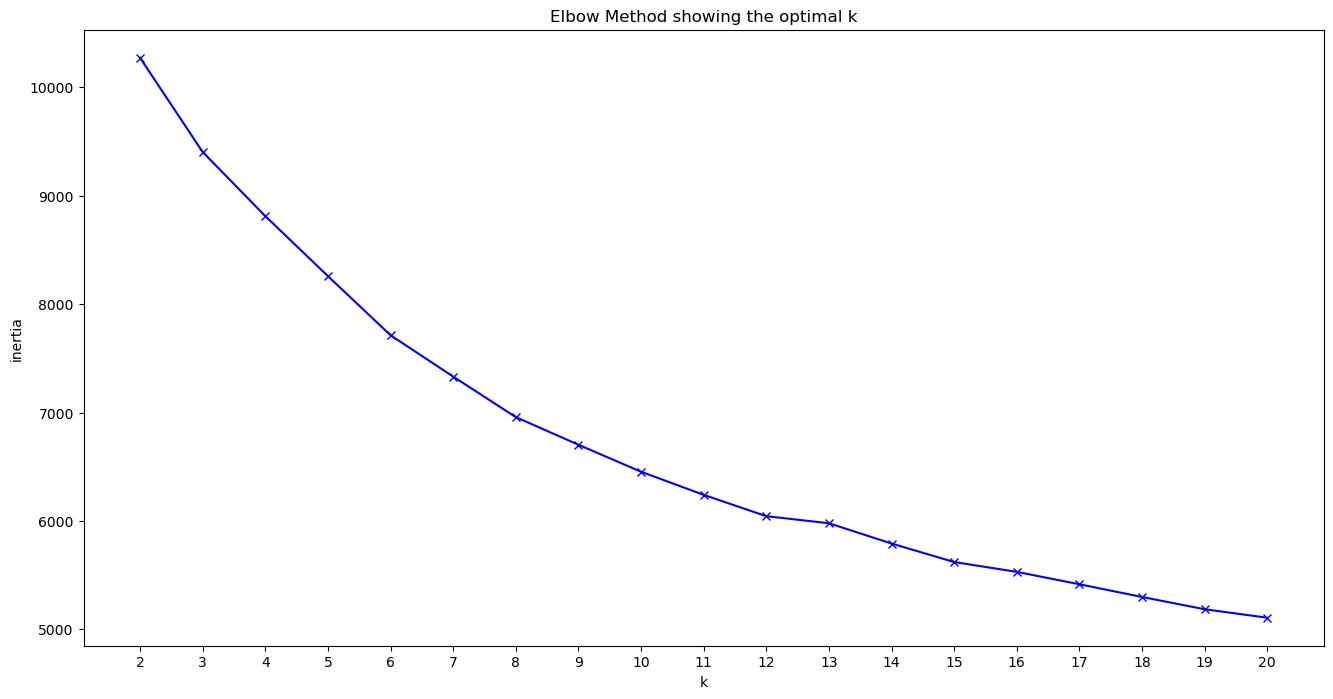

In [71]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_scaled_df)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

In [ ]:
#There seems to be an elbow at k=6

In [ ]:
#silhouette prove that the kluster is 6, Silhouette defines observations are in correct kluster or not 
#and it is the difference of how much observation is similar to the kluster and how much it is similar 
#to other kluster and when Silhouette is bigger it means that the observations is very Similar to their 
#own kluster -->  k=6


Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

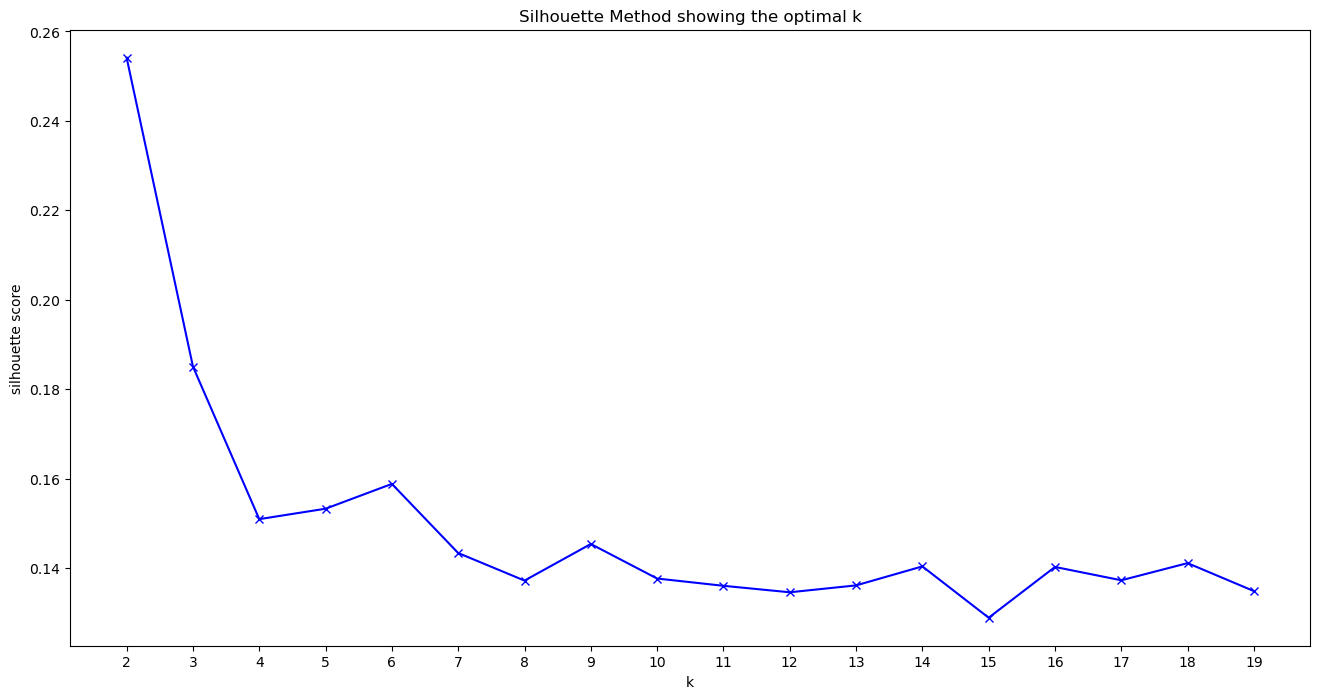

In [72]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234, n_init='auto')
    kmeans.fit(X_scaled_df)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(X_scaled_df, kmeans.predict(X_scaled_df)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

In [ ]:
#now we can come back and start with 6 clusters

In [85]:
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=1234)

kmeans.fit(X_scaled)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=6, random_state=1234)

In [86]:
#we label our klusters 
labels = kmeans.labels_
labels

array([1, 0, 5, ..., 0, 1, 0], dtype=int32)

In [87]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [88]:
#we predicted the klusters for our observations
clusters = kmeans.predict(X_scaled_df)

/Users/hana/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [89]:
#we can see how many observation we have in each kluster
pd.Series(clusters).value_counts().sort_index()

0    152
1    325
2     81
3    240
4     74
5    204
Name: count, dtype: int64

In [90]:
clusters

array([1, 0, 5, ..., 0, 1, 0], dtype=int32)

In [91]:
#X_df = pd.DataFrame(X), we created a column name clusters in df and separated our df in 3 clusters and seted 
#labels to our df

X['clusters'] = clusters
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
0,0.720,0.880,9,-2.834,1,0.1010,0.05620,0.060000,0.1530,0.463,180.011,197333,4,1
1,0.778,0.824,10,-5.892,0,0.0707,0.28400,0.000000,0.4050,0.758,100.024,218093,4,0
2,0.537,0.421,5,-8.720,1,0.0285,0.82700,0.000000,0.1380,0.524,98.224,184061,4,5
3,0.841,0.738,7,-7.455,0,0.3070,0.52000,0.000000,0.0892,0.484,169.918,172798,4,2
4,0.845,0.795,9,-3.502,0,0.0681,0.34300,0.000018,0.2240,0.681,94.969,197053,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,0.765,0.523,2,-4.333,1,0.0300,0.18400,0.000036,0.1320,0.394,104.988,217307,4,1
1072,0.548,0.816,0,-4.209,1,0.0465,0.12200,0.000000,0.3350,0.557,95.390,174000,4,0
1073,0.432,0.725,7,-4.862,1,0.0431,0.00273,0.000000,0.2080,0.353,128.902,228879,4,0
1074,0.774,0.753,4,-5.446,0,0.0517,0.15200,0.000000,0.0371,0.896,119.002,219147,4,1


In [92]:
#we got the sample to check the model
X[X['clusters']==2].sample()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,clusters
465,0.59,0.485,0,-5.262,0,0.197,0.81,0.0,0.281,0.695,148.851,147667,4,2


In [93]:
#calculating the inertia or sum of distances of each observation from their centroid of cluster
kmeans.inertia_

7713.100732285724

In [94]:
#Finally we saved the traind model with pickle and we dump model in to pickles

In [95]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [96]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 

In [97]:
scaler= load(filename="scaler.pickle")

In [98]:
kmeans_model = load(filename="kmeans_4.pickle")

In [99]:
kmeans_model

KMeans(n_clusters=6, random_state=1234)

In [100]:
scaler2 = load("scaler.pickle")